In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [2]:
import matplotlib.pyplot as plt #그래프 모듈 자주 사용해봄
import seaborn as sns # 처음봄
import missingno as msno # 결측치 시각화 할수있는거. 처음봄

# 데이터 불러오기

In [3]:
df = pd.read_csv("/kaggle/input/london-bike-sharing-dataset/london_merged.csv",parse_dates = ['timestamp']) # df 자주 써봄
#parse_dates 시간 데이터 별도의 옵션을 통해 처리
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
# 데이터의 타입과 구조
print('데이터의 구조:', df.shape) #17414행, 10열
print('데이터의 타입:', df.dtypes)
print('데이터의 column:', df.columns)
# 데이터 분석 시작시 데이터 구조, 타입 한번 보고 진행하시면 될거같아요

데이터의 구조: (17414, 10)
데이터의 타입: timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 column: Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [5]:
df.isna().sum() #결측치 확인, 결측치 없다.

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

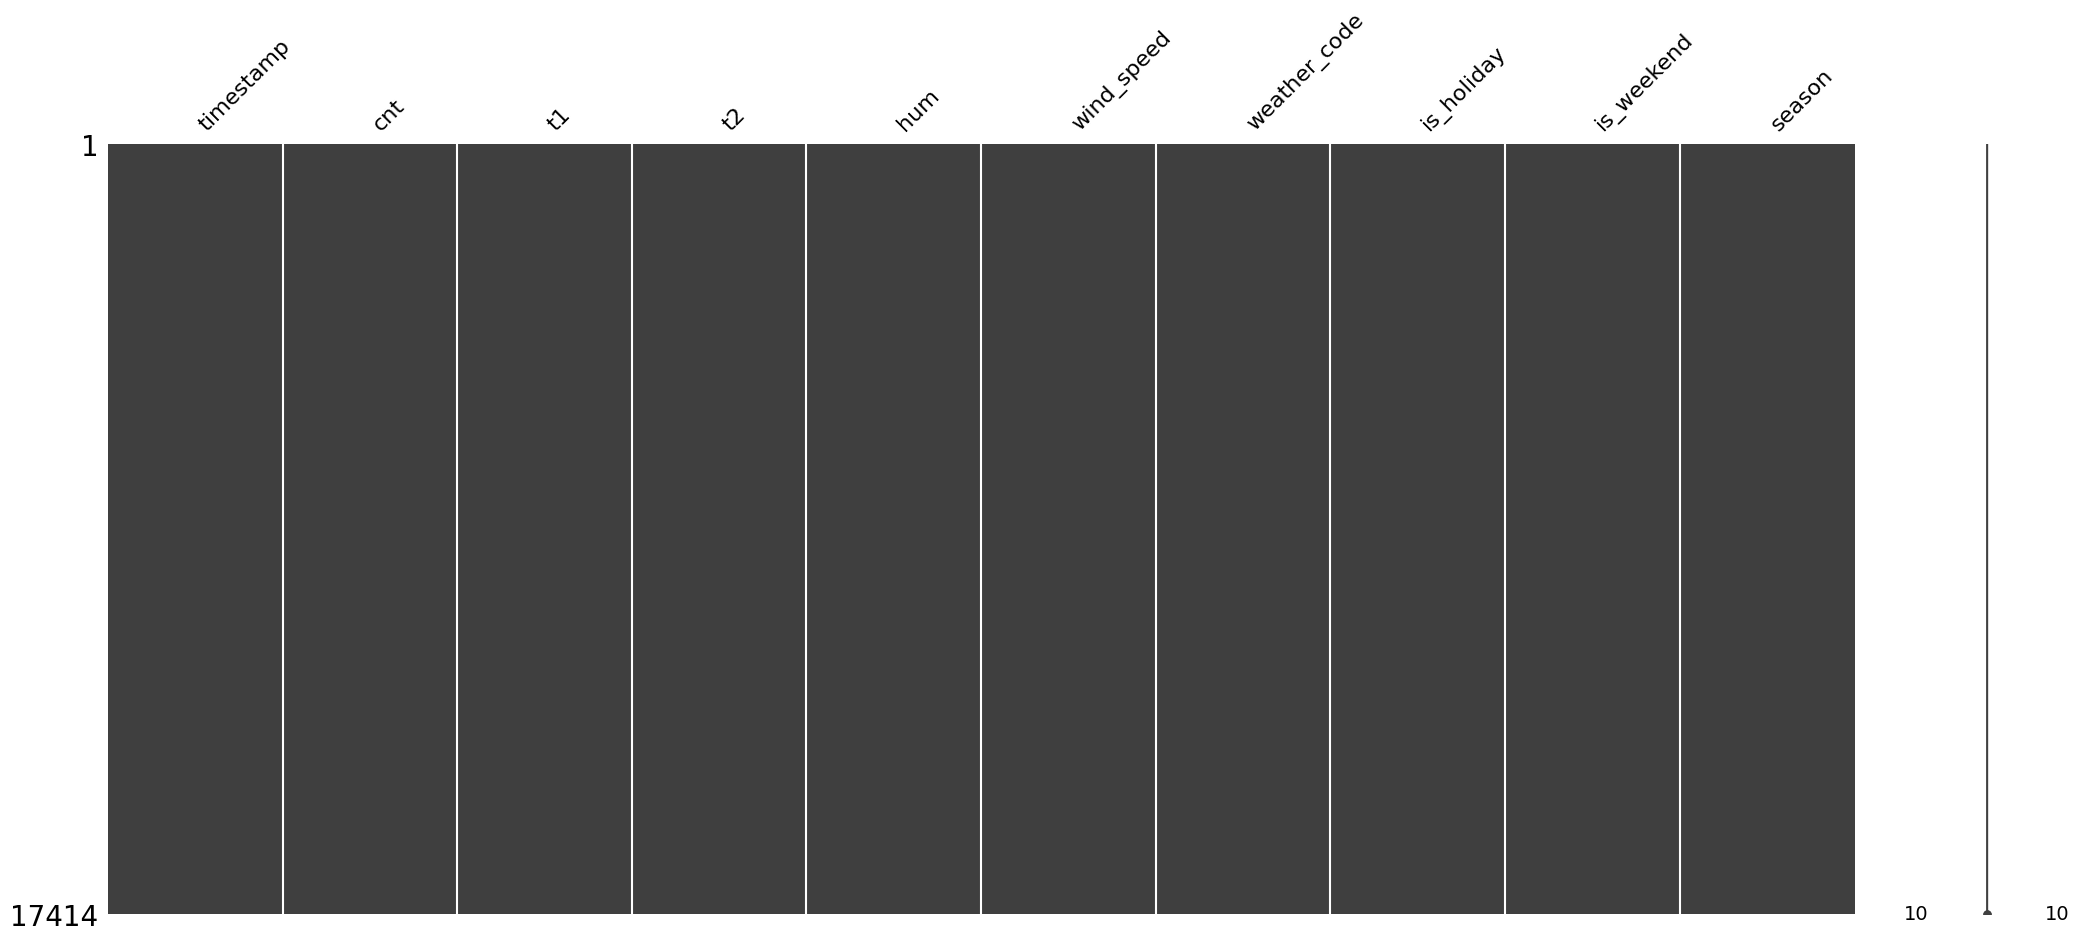

In [6]:
msno.matrix(df)
plt.show()# 결측치가 없어서 모두 검정으로 나옴

In [7]:
df['year'] = df['timestamp'].dt.year # 티임스탬프 년도 추출 year열 만들어서 추가
df['month'] = df['timestamp'].dt.month #월
df['dayofweek'] = df['timestamp'].dt.dayofweek #요일
df['hour'] = df['timestamp'].dt.hour # 시간
df.head()
#모델이 학습 할 수 있도록 많은 데이터를 추출하는것도 데이터 전처리 일부

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


탑색적 분석

In [8]:
df['year'].value_counts() # 데이터 구성확인

year
2016    8699
2015    8643
2017      72
Name: count, dtype: int64

In [9]:
df['month'].value_counts() # 데이터 구성확인

month
5     1488
1     1487
8     1484
12    1484
7     1481
10    1479
3     1468
4     1438
11    1430
6     1422
9     1394
2     1359
Name: count, dtype: int64

In [10]:
df['dayofweek'].value_counts() # 데이터 구성확인

dayofweek
0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: count, dtype: int64

In [11]:
df['weather_code'].value_counts() # weather_code 는 범주형 데이터 

#"weathe_code" category description:
#1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity0
#2 = scattered clouds / few clouds 
#3 = Broken clouds
#4 = Cloudy 
#7 = Rain/ light Rain shower/ Light rain 
#10 = rain with thunderstorm 
#26 = snowfall 
#94 = Freezing Fog 

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

# 그래프 활용 탐색적 분석

In [12]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


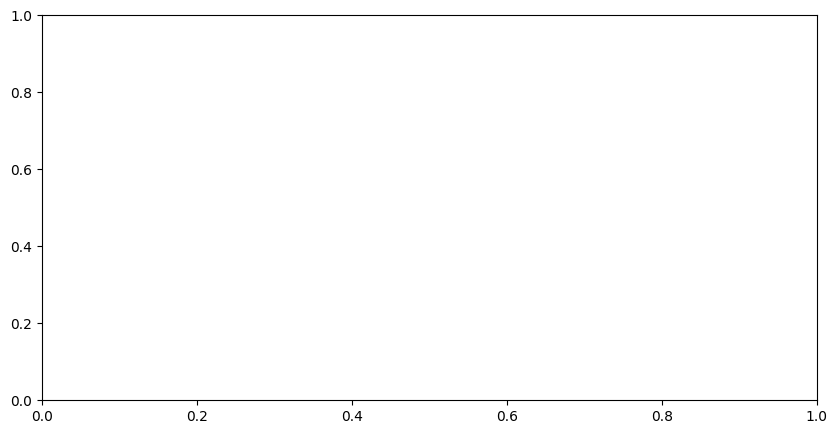

In [13]:
a,b = plt.subplots(1,1,figsize=(10,5))
# sns.boxplot(df['year'], df['cnt'])

<Axes: xlabel='year', ylabel='cnt'>

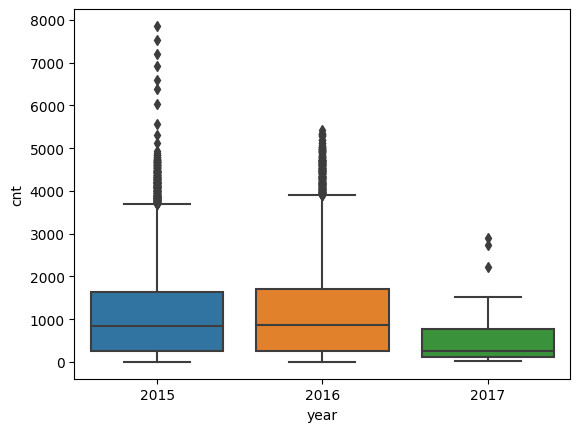

In [14]:
sns.boxplot(x=df['year'], y=df['cnt'])

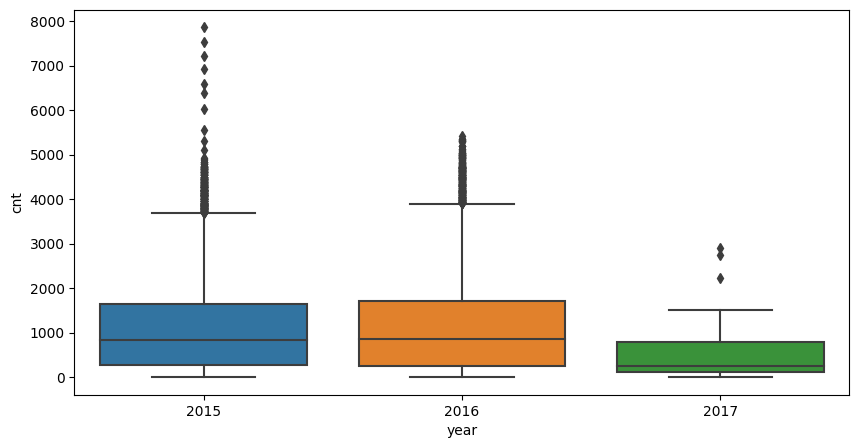

In [15]:
# df['year']와 df['cnt']를 x와 y로 지정하여 상자 그림을 그립니다
plt.figure(figsize=(10, 5))  # figure 크기 설정
sns.boxplot(x=df['year'], y=df['cnt'])
plt.show()
# max , 중위값, min 값 , 이상치
# 연도에 따라 다르고 17년도 부터는 자전거 이용객이 적다

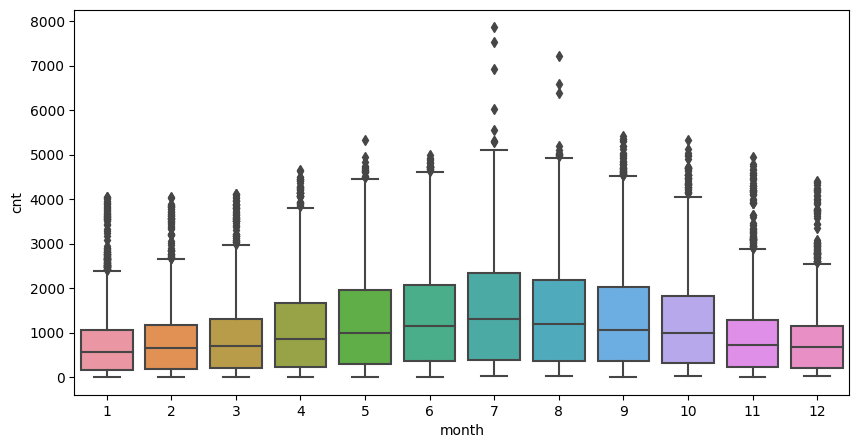

In [16]:
plt.figure(figsize=(10, 5))  # figure 크기 설정
sns.boxplot(x=df['month'], y=df['cnt'])
plt.show()
# 월별

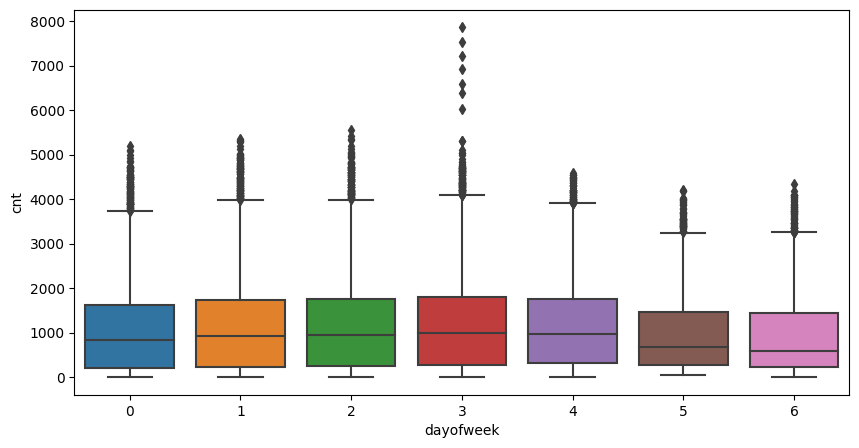

In [17]:
plt.figure(figsize=(10, 5))  # figure 크기 설정
sns.boxplot(x=df['dayofweek'], y=df['cnt'])
plt.show()
# 요일

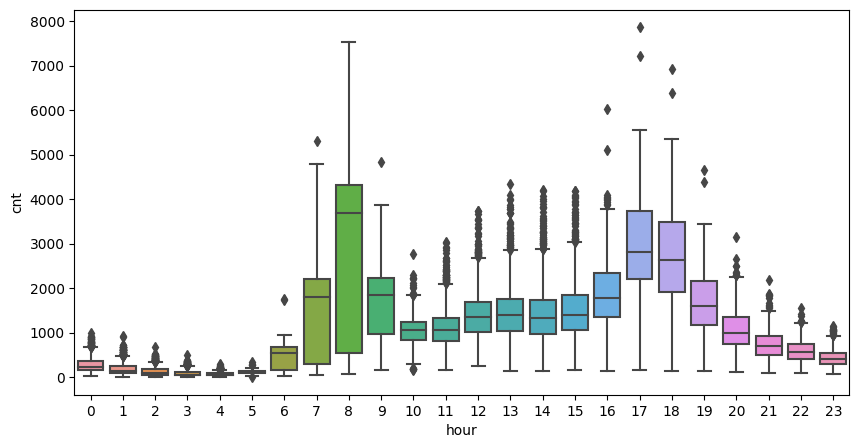

In [18]:
plt.figure(figsize=(10, 5))  # figure 크기 설정
sns.boxplot(x=df['hour'], y=df['cnt'])
plt.show()
# 시간 
#출퇴근 이용 때문에 평일에 더많은듯

In [19]:
# 단축키 만들듯이 변수
# 그래프 함수 만들기

def plot_bar(data,feature):
    fig = plt.figure(figsize=(12,3))
    sns.barplot(x=feature,y='cnt',data=data,palette='Set3',orient='v')
    
# orient v 소문자로

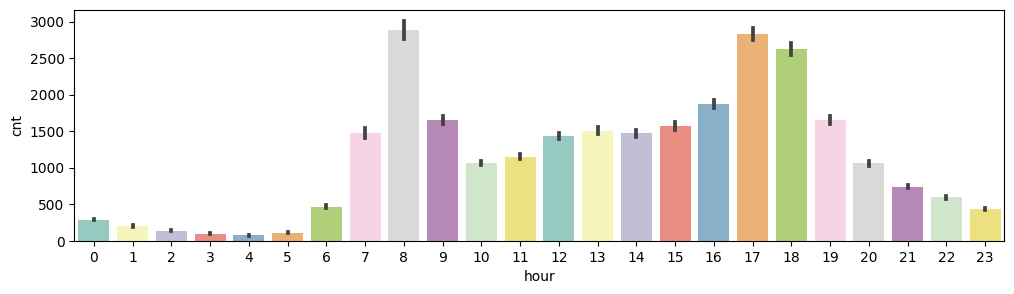

In [20]:
plot_bar(df,'hour')

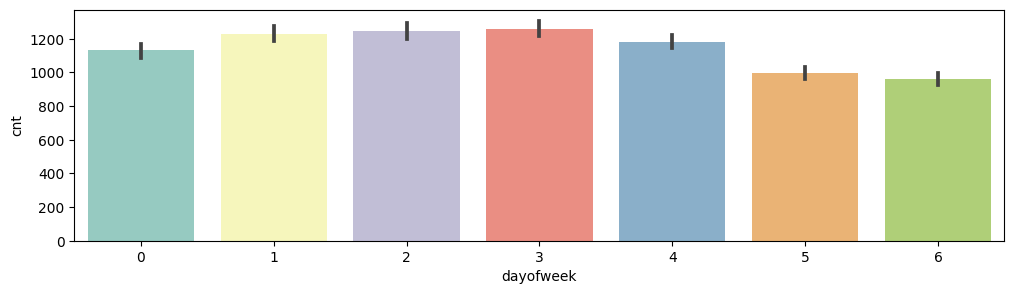

In [21]:
plot_bar(df,'dayofweek')

# 데이터 전처리

In [22]:
# # 이상치 제거 (아웃라이어 제거)
# # 함수 생성해서 작업 해보자
# def is_outliers(s):
#     lower_limit = s.mean() - (s.std()*3)
#     upper_limit = s.mean() + (s.std()*3)
#     return ~s.between(lower_limit, upper_limit)

In [23]:
# 시그마 이상치 제거 방법
# 데이터를 정규분포로 봤을때 양극단의 값을 이상치로 보고 이를 제거한다.
# 전체 데이터 중 약 0.3 양극단 값을 제거

In [24]:
print(df.shape)

(17414, 14)


In [25]:
# df_out = df[~df.groupby('hour')['cnt'].apply(is_outliers)] 
# # 시간대 별로 자전거 이용객 수를 기준으로 아웃라이어 함수 적용 
# print('이상치 제거 전:',df.shape)
# print('이상치 제거 후:',df_out.shape)

In [26]:
# def is_outliers(s):
#     lower_limit = s.mean() - (s.std()*3)
#     upper_limit = s.mean() + (s.std()*3)
#     outliers = s[~s.between(lower_limit, upper_limit)]
#     outliers.index = s.index  # 인덱스 재설정
#     return outliers

In [27]:
# outliers_removed = df.groupby('hour')['cnt'].apply(is_outliers)
# df_out = df[~df.index.isin(outliers_removed.index)]

In [28]:
def is_outliers(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    outliers_mask = ~s.between(lower_limit, upper_limit)
    return s[outliers_mask]

In [29]:
# 데이터프레임 필터링
outliers_removed = df.groupby('hour')['cnt'].apply(is_outliers)
outliers_index = outliers_removed.reset_index(level=0, drop=True).index
df_out = df[~df.index.isin(outliers_index)]

In [30]:
print('이상치 제거 전:',df.shape)
print('이상치 제거 후:', df_out.shape)

이상치 제거 전: (17414, 14)
이상치 제거 후: (17265, 14)


In [31]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int32
month                    int32
dayofweek                int32
hour                     int32
dtype: object

In [32]:

df_out['weather_code'] = df_out['weather_code'].astype('category') # 카테고리형 변환
df_out['season'] = df_out['season'].astype('category') # 카테고리형 변환
df_out['year'] = df_out['year'].astype('category') # 카테고리형 변환
df_out['month'] = df_out['month'].astype('category') # 카테고리형 변환
df_out['hour'] = df_out['hour'].astype('category') # 카테고리형 변환
#astype 기능 : 원하는 타입으로 바꾸기


/tmp/ipykernel_43/1258681058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['weather_code'] = df_out['weather_code'].astype('category') # 카테고리형 변환
/tmp/ipykernel_43/1258681058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['season'] = df_out['season'].astype('category') # 카테고리형 변환
/tmp/ipykernel_43/1258681058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [33]:
df_out.dtypes # type category로 잘바뀜

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int32
hour                  category
dtype: object

In [34]:
# 머신러닝 크게 모형에 영향을 주지 않을수있음
# 딥러닝 반드시 더미처리를 해줘야함
# 더미처리: 0과1 이진의 숫자로 바꿔 컴퓨터가 더 잘처리할수 있도록 함

In [35]:
df_out['season']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
17409    3.0
17410    3.0
17411    3.0
17412    3.0
17413    3.0
Name: season, Length: 17265, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

In [36]:
df_out = pd.get_dummies(df_out,columns=['weather_code','season','year','month','hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,False,...,False,False,False,False,False,False,False,False,False,False
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,True,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,True,...,False,False,False,False,False,False,False,False,False,False
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,True,...,False,False,False,False,False,False,False,False,False,False
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,True,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df_out.shape

(17265, 59)

In [38]:
# cnt 종속 변수 그 외는 독립 변수 
# 데이터(종속 변수,독립 변수) 분리 
df_y = df_out['cnt']
df_x = df_out.drop(['timestamp','cnt'],axis = 1)
# timestamp는 다 활용했으므로 버리고, cnt는 종속변수, axis를 1로하면 열 기준 삭제, 0은 행
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,3.0,2.5,93.0,5.0,0.0,1.0,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.5,2.5,96.5,0.0,0.0,1.0,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,2.0,100.0,0.0,0.0,1.0,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,0.0,93.0,6.5,0.0,1.0,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
df_y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

In [40]:
#train 데이터 test 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,
                                                    random_state=60, 
                                                    test_size=0.3,
                                                    shuffle=False)
# random_state 값 지정 매번 동일데이터로 분리
# 시계열 데이터는 shuffle(데이터 순서 섞는 기능) 하지 않음 

In [41]:
print('x_train 구조:' , x_train.shape)
print('y_train 구조:' , y_train.shape)
print('x_test 구조:' , x_test.shape)
print('y_test 구조:' , y_test.shape)

x_train 구조: (12085, 57)
y_train 구조: (12085,)
x_test 구조: (5180, 57)
y_test 구조: (5180,)


# 딥러닝 학습 자전거 수요 예측 vs 머신러닝 학습 자전거 수요 예측 (차이)

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping #과적합 방지

In [43]:
model = Sequential()
model.add(Dense(units=160, activation='relu',input_dim=57))
model.add(Dense(units=60,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=1,activation='linear'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               9280      
                                                                 
 dense_1 (Dense)             (None, 60)                9660      
                                                                 
 dense_2 (Dense)             (None, 20)                1220      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 20181 (78.83 KB)
Trainable params: 20181 (78.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
print(type(x_train))
print(type(y_train))
print(np.isnan(x_train).any())
print(np.isnan(y_train).any())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
t1                   False
t2                   False
hum                  False
wind_speed           False
is_holiday           False
is_weekend           False
dayofweek            False
weather_code_1.0     False
weather_code_2.0     False
weather_code_3.0     False
weather_code_4.0     False
weather_code_7.0     False
weather_code_10.0    False
weather_code_26.0    False
season_0.0           False
season_1.0           False
season_2.0           False
season_3.0           False
year_2015            False
year_2016            False
year_2017            False
month_1              False
month_2              False
month_3              False
month_4              False
month_5              False
month_6              False
month_7              False
month_8              False
month_9              False
month_10             False
month_11             False
month_12             False
hour_0               False
hour_1  

In [54]:
print(type(x_test))
print(type(y_test))
print(np.isnan(x_test).any())
print(np.isnan(y_test).any())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
t1                   False
t2                   False
hum                  False
wind_speed           False
is_holiday           False
is_weekend           False
dayofweek            False
weather_code_1.0     False
weather_code_2.0     False
weather_code_3.0     False
weather_code_4.0     False
weather_code_7.0     False
weather_code_10.0    False
weather_code_26.0    False
season_0.0           False
season_1.0           False
season_2.0           False
season_3.0           False
year_2015            False
year_2016            False
year_2017            False
month_1              False
month_2              False
month_3              False
month_4              False
month_5              False
month_6              False
month_7              False
month_8              False
month_9              False
month_10             False
month_11             False
month_12             False
hour_0               False
hour_1  

In [46]:
x_train = x_train.values
y_train = y_train.values

In [55]:
x_test = x_test.values
y_test = y_test.values

In [47]:
y_train = y_train.astype(float)
x_train = x_train.astype(float)

In [56]:
y_test = y_test.astype(float)
x_test = x_test.astype(float)

In [48]:
print(type(x_train))
print(type(y_train))
print(x_train.shape)
print(y_train.shape)
print(x_train.dtype)
print(y_train.dtype)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(12085, 57)
(12085,)
float64
float64


# 딥러닝

In [50]:
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
#mae?
early_stopping = EarlyStopping(monitor='loss',patience=5,mode='min')
#patience 과적학 될때 5번 로스가 올라가면 멈추기
history = model.fit(x_train,y_train,epochs=50,batch_size=1, validation_split=0.1,callbacks=[early_stopping])

Epoch 1/50
10876/10876 [==============================] - 17s 2ms/step - loss: 378.7567 - mae: 378.7567 - val_loss: 336.8520 - val_mae: 336.8520
Epoch 2/50
10876/10876 [==============================] - 17s 2ms/step - loss: 262.7379 - mae: 262.7379 - val_loss: 230.2885 - val_mae: 230.2885
Epoch 3/50
10876/10876 [==============================] - 16s 1ms/step - loss: 221.2716 - mae: 221.2716 - val_loss: 221.2552 - val_mae: 221.2552
Epoch 4/50
10876/10876 [==============================] - 17s 2ms/step - loss: 197.6855 - mae: 197.6855 - val_loss: 186.9822 - val_mae: 186.9822
Epoch 5/50
10876/10876 [==============================] - 18s 2ms/step - loss: 180.2668 - mae: 180.2668 - val_loss: 170.5374 - val_mae: 170.5374
Epoch 6/50
10876/10876 [==============================] - 16s 1ms/step - loss: 167.7041 - mae: 167.7041 - val_loss: 165.1344 - val_mae: 165.1344
Epoch 7/50
10876/10876 [==============================] - 16s 1ms/step - loss: 162.5023 - mae: 162.5023 - val_loss: 164.2133 - val

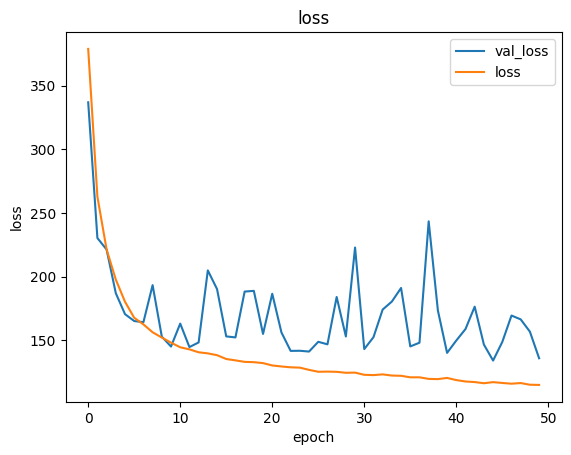

In [51]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['val_loss','loss'])
plt.show()

In [57]:
y_predict = model.predict(x_test)

162/162 [==============================] - 0s 926us/step


# 머신 러닝

In [58]:
# 랜덤 포레스트, 앙상블 기법, 병렬
# 부스팅 계열, 순차적, xgbm? rigth gbm

In [59]:
from sklearn.metrics import mean_squared_error

# rmse : mse에 루트
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test,y_predict))
print('RMSE', RMSE(y_test,y_predict))

RMSE 255.76828393443162


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=16)
rf.fit(x_train,y_train)
rf_result = rf.predict(x_test)
print('RMSE',RMSE(y_test, rf_result))

RMSE 303.6417775662534


In [ ]:
# 딥러닝보다 랜덤 포레스트가 성능이 떨어졌다.

In [62]:
from xgboost import XGBRegressor
# 자전거 이용객수 예측이기 떄문에 regressor
xgb = XGBRegressor(n_estimators=100,random_state=16)
xgb.fit(x_train,y_train)
xgb_result = xgb.predict(x_test)
print('RMSE',RMSE(y_test,xgb_result))

RMSE 320.14419864156974


In [ ]:
#랜덤 포레스트보다 성능이 xgb 떨어졌다.

In [63]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=100, random_state=16)
lgb.fit(x_train,y_train)
lgb_result = lgb.predict(x_test)
print('RMSE',RMSE(y_test,lgb_result))

RMSE 323.2746495922864


In [ ]:
# 실제 업무를 하다보면 일단 파라미터가 잘맞고 전처리만 잘하면 
# XGBoost가,LGBMRegressor가 랜덤포레스트보단 잘나옴